In [160]:
# Importing Python packages

import pandas as pd
import numpy as np
import plotnine as p9
import os
import geopandas as gpd
from pathlib import Path
import re

# Data ingest

In [161]:
# Reading in masterplan data

data_masterplan_input = pd.read_excel('MP_Info_20240724.xlsx',sheet_name= 'MasterPlans_Summary')
data_masterplan_input.head(1)

,S,Municipality,ProjectID,Include in Summary,Project Name,Parent Project Number,MP Lvl,Developer,District,2024Precinct,...,2034,2035,2036,2037,2038,2039,2040,Cumm.,2040 MP Assignment,Remarks
0,1.0,Abu Dhabi,1099.0,No,Reem Island,NaN,Level 0,Multiple,AL REEM ISLAND,CBD-Mina- Reem-Maryah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [162]:
# Reading in TMP 2040 data

tmp_2040_input = pd.read_csv('20240605_TAZ_TMP_2040.csv')
tmp_2040_input.head(1)


,Z,Unnamed: 1,Master plan,PRODSECTOR,AREATYPE,AREATYPE2,UPC_PRECIN,PRECINCT_,HH,POP_NONLAB,...,SECT_INT,REG,TOD_A,TOD_P,HGV_PERMIT,ADSICDIST,DISTNAME,TMP,UDM_DIST,MP_ProjectID
0,1.0,ADM,MP,2.0,9.0,11.0,28.0,Saadiyat Island,283.0,2150.0,...,0.0,1.0,0.0,0.0,1.0,67.0,SADIYAT ISLAND,Saadiyat Lagoons TMP - Saadiyat,AL SAADIYAT ISLAND,1007.42.4


In [163]:

# Reading in land use crosswalk

land_use_crosswalk = pd.read_csv('taxonomy_crosswalks.csv')
land_use_crosswalk = land_use_crosswalk[land_use_crosswalk['CROSSWALK'] == 'MP to TMP 2040 land use']
land_use_crosswalk = land_use_crosswalk[['VARIABLE_1','VARIABLE_2']]
land_use_crosswalk.head(1)

,VARIABLE_1,VARIABLE_2


In [164]:
# Reading in TMP summary land use cross wale

mp_tmp_summary_crosswalk = pd.read_csv('taxonomy_crosswalks.csv')
mp_tmp_summary_crosswalk = mp_tmp_summary_crosswalk[mp_tmp_summary_crosswalk['CROSSWALK'] == 'MP to TMP 2040 Summary Land Use']
mp_tmp_summary_crosswalk = mp_tmp_summary_crosswalk[['VARIABLE_1','VARIABLE_2']]
mp_tmp_summary_crosswalk.head(3)

,VARIABLE_1,VARIABLE_2
17,Residential GFA,RES_GFA
18,Retail GFA,RETAIL_GFA
19,Office GFA,OFFICE_GFA


In [165]:

# Reading in land use crosswalk

tmp_summary_crosswalk = pd.read_csv('taxonomy_crosswalks.csv')
tmp_summary_crosswalk = tmp_summary_crosswalk[tmp_summary_crosswalk['CROSSWALK'] == 'TMP 2040 to Summary 2040 land uses'].reset_index(drop = True)
tmp_summary_crosswalk = tmp_summary_crosswalk[['VARIABLE_1','VARIABLE_2']]
tmp_summary_crosswalk.head(1)

,VARIABLE_1,VARIABLE_2
0,RES_GFA,RES_GFA


In [166]:
# Reading in unit size assumptions

unit_densities = pd.read_csv('land_use_gfa_densities.csv')
unit_densities.head(2)

,land_use,size_gfa,source
0,Residential - Villas Emiratis,700,CBRE estimate
1,Residential - Villas Non-Emiratis,400,CBRE estimate


In [167]:
# Reading in taxonomies 

taxonomies = pd.read_csv('taxonomies.csv')

# Separating out taxonomies

masterplan_development_metrics = taxonomies[taxonomies['TAXONOMY'] == 'Masterplan Development Metrics']
masterplan_development_metrics = masterplan_development_metrics['VARIABLE'].tolist()

In [172]:
# Reading in baseline TAZ data

sharepoint_path = f'C:/Users/{os.environ.get( "USERNAME" )}/Buro Happold'
project_path = Path(f"{sharepoint_path}/P060927 Plan Capital 2040 - 02_Documents/11_GIS/05 Urban Models")
ium_path = os.path.join(project_path,'ium_ad.gpkg')
zone_taz_2022 = gpd.read_file(ium_path, layer='zone_taz_2022')
zone_taz_2022.head(1)

# Reading in taz zone delta

zone_taz_delta = gpd.read_file(ium_path, layer='zone_taz_delta')
#zone_taz_delta['ProjectID'] = zone_taz_delta['masterplan_projectid']
#zone_taz_delta.head(1)
zone_taz_delta


DriverError: malformed database schema (rtree_boundary_tod_geom_update3) - no such table: main.boundary_tod

In [ ]:
# Creating masterplan to TAZ map

mp_taz_map = zone_taz_delta[['ZONE','masterplan_projectid']]

# Cleaning masterplan data

In [ ]:
# Function to remove letters and punctuation
def remove_letters_and_punctuation(value):
    return re.sub(r'[^\d]', '', value)

In [ ]:
# Cleaning masterplan data

masterplan_data = data_masterplan_input[~data_masterplan_input['S'].isna()] # Filtering rows without IDs in S column
masterplan_data = masterplan_data[masterplan_data['Include in Summary'] == 'Yes'] # Filtering out MPs not to include in summary
masterplan_data = masterplan_data[masterplan_data['Delivery Status'] != 'Completed'] # Filtering out completed masterplans
masterplan_data.head(1)

,S,Municipality,ProjectID,Include in Summary,Project Name,Parent Project Number,MP Lvl,Developer,District,2024Precinct,...,2034,2035,2036,2037,2038,2039,2040,Cumm.,2040 MP Assignment,Remarks
1,2.0,Abu Dhabi,1072.0,Yes,"Shams, Reem Island",1099.0,Level 1,Aldar,AL REEM ISLAND,CBD-Mina- Reem-Maryah,...,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,NaN


In [ ]:
# Cleaning masterplan by TMP alignment status for plotting

align_data = masterplan_data[['S','TMP Aligned']]
align_data['num'] = 1
align_data = align_data.groupby(['TMP Aligned'])['num'].agg('sum')
align_data = align_data.reset_index()

# Presenting info about about the dataframe

print(align_data['num'].sum())

164


C:\Users\jtindale\AppData\Local\Temp\ipykernel_30892\2822824875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


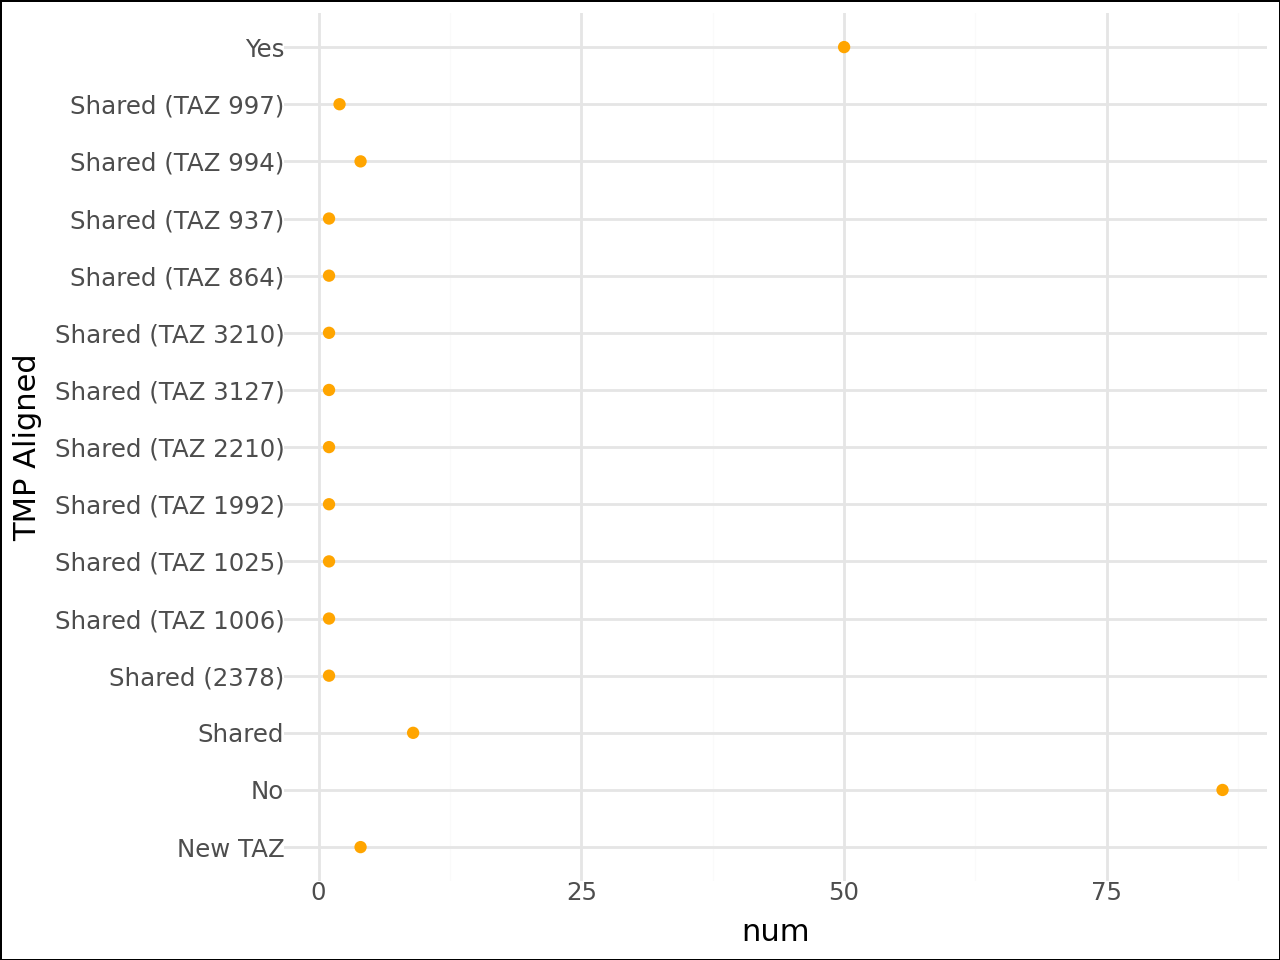

In [ ]:
# Plotting cleaned data

(p9.ggplot(align_data,p9.aes(x = 'num',
    y = 'TMP Aligned')) +
 p9.geom_point(colour = 'orange') +
 p9.theme_minimal() +
 p9.theme(plot_background= p9.element_rect(fill = 'white')))

# Cleaning TMP 2040 data

In [ ]:
# Creating list to select floorspace types from the TMP 2040 dataset
tmp_2040_floorspace_types = pd.read_csv('taxonomy_crosswalks.csv')
tmp_2040_floorspace_types = tmp_2040_floorspace_types[tmp_2040_floorspace_types['CROSSWALK'] == 'TMP 2040 to Summary 2040 land uses']
tmp_2040_floorspace_types = tmp_2040_floorspace_types['VARIABLE_1'].tolist()
print(tmp_2040_floorspace_types)

['RES_GFA', 'RETAIL_GFA', 'OFFICE_GFA', 'L_IND_GFA', 'M_IND_GFA', 'H_IND_GFA', 'SCHOOL_GFA', 'MED_GFA', 'HOTELROOMS', 'OTHER_GFA']


In [ ]:
# Creating dataframe that contains areas based on the TMP 2040 dataset

tmp_2040_areas = tmp_2040_input.copy()
tmp_2040_areas = tmp_2040_areas[tmp_2040_floorspace_types]
tmp_2040_areas = pd.concat([tmp_2040_input[['Z','MP_ProjectID']],tmp_2040_areas],axis = 1)
tmp_2040_areas = tmp_2040_areas[~tmp_2040_areas['Z'].isna()]
tmp_2040_areas.head(1)

,Z,MP_ProjectID,RES_GFA,RETAIL_GFA,OFFICE_GFA,L_IND_GFA,M_IND_GFA,H_IND_GFA,SCHOOL_GFA,MED_GFA,HOTELROOMS,OTHER_GFA
0,1.0,1007.42.4,155745.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0


In [ ]:
# Shifting dataframe containing areas based on the TMP 2040 data across to the summary TMP land uses

tmp_2040_areas_long_summary = tmp_2040_areas.melt(id_vars= ['Z','MP_ProjectID']).rename({'variable':'VARIABLE_1'},axis = 1)
tmp_2040_areas_long_summary = tmp_2040_areas_long_summary.merge(tmp_summary_crosswalk,how = 'left',on = 'VARIABLE_1')
tmp_2040_areas_long_summary = tmp_2040_areas_long_summary.groupby(['Z','VARIABLE_2'])['value'].agg('sum').reset_index().rename({'Z':'ZONE'},axis =1)
tmp_2040_areas_long_summary = tmp_2040_areas_long_summary.merge(mp_taz_map,how= 'left',on = 'ZONE')
tmp_2040_areas_long_summary = tmp_2040_areas_long_summary.rename({'masterplan_projectid':'ProjectID'},axis = 1)
tmp_2040_areas_long_summary.head(2)

,ZONE,VARIABLE_2,value,ProjectID
0,1.0,HOTELROOMS,0.0,NaN
1,1.0,IND_GFA,0.0,NaN


# Converting Non-TMP Aligned Masterplans to TAZ level

In [ ]:
# Filtering out masterplans that are aligned with the TMP

masterplan_non_aligned = masterplan_data.copy()
masterplan_non_aligned = masterplan_non_aligned[masterplan_non_aligned['TMP Aligned'] != 'Yes'].reset_index(drop = True)
masterplan_non_aligned.head(1)

,S,Municipality,ProjectID,Include in Summary,Project Name,Parent Project Number,MP Lvl,Developer,District,2024Precinct,...,2034,2035,2036,2037,2038,2039,2040,Cumm.,2040 MP Assignment,Remarks
0,9.0,Abu Dhabi,38988.0,Yes,Reem Hills - Phase 3,1099.0,Level 0,Reem Hills,AL REEM ISLAND,CBD-Mina- Reem-Maryah,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [ ]:
# Removing non-aligned TAZs from the map

mp_taz_map_non_aligned = mp_taz_map.copy()
mp_taz_map_non_aligned = mp_taz_map_non_aligned.dropna().reset_index(drop = True)
mp_taz_map_non_aligned = mp_taz_map_non_aligned.rename({'masterplan_projectid':'ProjectID'},axis = 1)
mp_taz_map_non_aligned.head(1)

,ZONE,ProjectID
0,3372,5000.34


In [ ]:
# Left joining masterplan data to the non aligned TMP MP to TAZ map

masterplan_non_aligned = mp_taz_map_non_aligned.merge(masterplan_data,how = 'left', on = 'ProjectID')

# Bolting on land area

masterplan_non_aligned = masterplan_non_aligned.merge(zone_taz_delta[['ZONE','ProjectID','AREA']], how = 'left', on = ['ZONE','ProjectID'])
masterplan_non_aligned.head(1)

,ZONE,ProjectID,S,Municipality,Include in Summary,Project Name,Parent Project Number,MP Lvl,Developer,District,...,2035,2036,2037,2038,2039,2040,Cumm.,2040 MP Assignment,Remarks,AREA
0,3372,5000.34,244.0,Abu Dhabi,Yes,KIZAD Area B,NaN,Level 0,Abu Dhabi Ports,KHALIFA INDUSTRIAL,...,NaN,NaN,NaN,NaN,NaN,0.35,0.35,1.0,NaN,3.06214


In [ ]:
# Taking areas from the non-TMP aligned masterplans and proportioning out development between TAZs based on land area

masterplan_non_aligned_areas = masterplan_non_aligned.copy() #  Creating copy of dataframe
masterplan_non_aligned_areas = masterplan_non_aligned_areas[masterplan_development_metrics].fillna(0) # Selecting metric columns and filling in nas
masterplan_non_aligned_areas = pd.concat([masterplan_non_aligned[['ZONE','ProjectID','AREA','EH']],masterplan_non_aligned_areas],axis = 1) # Concatenating with key tags
masterplan_non_aligned_areas['PER'] = masterplan_non_aligned_areas.groupby('ProjectID')['AREA'].transform('sum')
masterplan_non_aligned_areas['PER'] = masterplan_non_aligned_areas.apply(lambda row: row['AREA']/row['PER'],axis = 1) # Calculating percentage development to be allocated to each TAZ based on the land area of those TAZs

# Divide all numeric columns by the 'PER' column using a lambda function

numeric_cols = masterplan_non_aligned_areas.select_dtypes(include='number').columns
masterplan_non_aligned_areas[numeric_cols] = masterplan_non_aligned_areas[numeric_cols].apply(lambda x: x * masterplan_non_aligned_areas['PER'])
masterplan_non_aligned_areas = masterplan_non_aligned_areas.drop(['PER','AREA'],axis = 1)
masterplan_non_aligned_areas.head(1)

,ZONE,ProjectID,EH,Residential Units,Apt,Villa,Residential GFA,Retail GFA,Office GFA,Hotel GFA,Community Facilities GFA,Industrial GFA,Other GFA,Education GFA,Health Care GFA
0,800.047735,5000.34,NaN,7388.341186,7388.341186,0.0,668259.56373,178984.344701,1.406790e+06,2847.144966,78591.640587,1.209107e+07,0.0,0.0,0.0


In [ ]:
# Creating final dataframe for combining with the results of the TMP aligned masterplan allocation process

masterplan_non_aligned_final = masterplan_non_aligned_areas.copy()
masterplan_non_aligned_final.head(1)

,ZONE,ProjectID,EH,Residential Units,Apt,Villa,Residential GFA,Retail GFA,Office GFA,Hotel GFA,Community Facilities GFA,Industrial GFA,Other GFA,Education GFA,Health Care GFA
0,800.047735,5000.34,NaN,7388.341186,7388.341186,0.0,668259.56373,178984.344701,1.406790e+06,2847.144966,78591.640587,1.209107e+07,0.0,0.0,0.0


# Converting TMP Aligned Masterplans to TMP land uses

In [ ]:
# Making copy of masterplan data for conversion

masterplan_aligned = masterplan_data.copy()
masterplan_aligned.head(1)

,S,Municipality,ProjectID,Include in Summary,Project Name,Parent Project Number,MP Lvl,Developer,District,2024Precinct,...,2034,2035,2036,2037,2038,2039,2040,Cumm.,2040 MP Assignment,Remarks
1,2.0,Abu Dhabi,1072.0,Yes,"Shams, Reem Island",1099.0,Level 1,Aldar,AL REEM ISLAND,CBD-Mina- Reem-Maryah,...,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,NaN


In [ ]:
# Creating a dataframe containing the main masterplan, turning the data to long form and filling in missing values in a metric column with 0s

masterplan_aligned_areas = pd.concat([masterplan_aligned[['ProjectID','EH']],masterplan_aligned[masterplan_development_metrics]],axis = 1)
masterplan_aligned_areas = masterplan_aligned_areas.melt(id_vars= ['ProjectID','EH'])
masterplan_aligned_areas['value'] = masterplan_aligned_areas['value'].fillna(0)
masterplan_aligned_areas.head(3)


,ProjectID,EH,variable,value
0,1072.0,NaN,Residential Units,29663.0
1,1089.56,NaN,Residential Units,12616.0
2,1089.62,NaN,Residential Units,24831.0


In [ ]:
# Converting aligned masterplans across to TMP land uses by adding on a crosswalk

masterplan_aligned_tmp = masterplan_aligned_areas.rename({'variable':'VARIABLE_1'}, axis = 1)
masterplan_aligned_tmp = masterplan_aligned_tmp.merge(mp_tmp_summary_crosswalk,how = 'left', on = 'VARIABLE_1')
masterplan_aligned_tmp= masterplan_aligned_tmp[~masterplan_aligned_tmp['VARIABLE_2'].isna()].drop(['VARIABLE_1'],axis = 1)
masterplan_aligned_tmp['EH'] = masterplan_aligned_tmp['EH'].fillna('No')

# Creating split for non-residential land uses and aggregating

masterplan_aligned_tmp_nonres_split = masterplan_aligned_tmp[masterplan_aligned_tmp['VARIABLE_2'] != 'RES_GFA'].drop(['EH'],axis =1)
masterplan_aligned_tmp_nonres_split = masterplan_aligned_tmp_nonres_split.groupby(['ProjectID','VARIABLE_2']).agg('sum').reset_index()

# Creating split for residential land uses and aggregating

masterplan_aligned_tmp_res_split = masterplan_aligned_tmp[masterplan_aligned_tmp['VARIABLE_2'] == 'RES_GFA']
masterplan_aligned_tmp_res_split = masterplan_aligned_tmp_res_split.groupby(['ProjectID','VARIABLE_2','EH']).agg('sum').reset_index()
masterplan_aligned_tmp_res_split.head(1)


,ProjectID,VARIABLE_2,EH,value
0,1001.15,RES_GFA,No,239170.0


# Checking whether aligned development is allocated in the same landuse in MPs and the TMP 2040

In [ ]:
# Creating dataframe for allocating non-masterplan aligned development to TAZs

masterplan_aligned_nonres = tmp_2040_areas_long_summary.copy()
masterplan_aligned_nonres = masterplan_aligned_nonres[~masterplan_aligned_nonres['ProjectID'].isna()].reset_index(drop = True)
masterplan_aligned_nonres = masterplan_aligned_nonres[masterplan_aligned_nonres['VARIABLE_2'] !='RES_GFA'].rename({'value':'TAZ_AREA'},axis = 1)
masterplan_aligned_nonres = masterplan_aligned_nonres.merge(masterplan_aligned_tmp_nonres_split, how = 'left', on = ['ProjectID','VARIABLE_2'])
masterplan_aligned_nonres.head(1)


,ZONE,VARIABLE_2,TAZ_AREA,ProjectID,value
0,8.0,HOTELROOMS,0.0,1007.42.1,0.0


In [ ]:
# Allocating non-residential floorspace where masterplans and TAZs matxh up  

masterplan_aligned_nonres_1 = masterplan_aligned_nonres.copy()
masterplan_aligned_nonres_1['check'] = masterplan_aligned_nonres_1.apply(lambda row: 'Yes' if (row['TAZ_AREA'] > 0) & (row['value'] > 0) else 'No',axis = 1)
masterplan_aligned_nonres_1  = masterplan_aligned_nonres_1[masterplan_aligned_nonres_1['check'] == 'Yes'].reset_index(drop = True)
masterplan_aligned_nonres_1['PER'] = masterplan_aligned_nonres_1.groupby(['ZONE','VARIABLE_2'])['TAZ_AREA'].transform('sum')
masterplan_aligned_nonres_1['value'].sum()
masterplan_aligned_nonres_1['PER'] = masterplan_aligned_nonres_1.apply(lambda row: row['TAZ_AREA']/row['PER'],axis = 1)
masterplan_aligned_nonres_1['ALLOCATED'] = masterplan_aligned_nonres_1.apply(lambda row: row['value']*row['PER'],axis = 1)
masterplan_aligned_nonres_1 = masterplan_aligned_nonres_1[['ZONE','ProjectID','VARIABLE_2','ALLOCATED']]
masterplan_aligned_nonres_1.head(1)

,ZONE,ProjectID,VARIABLE_2,ALLOCATED
0,8.0,1007.42.1,OTHER_GFA,13229.0


In [171]:
# Total non-residential area sense-check

masterplan_aligned_nonres_2 = masterplan_aligned_nonres.copy()
masterplan_aligned_nonres_2['check'] = masterplan_aligned_nonres_2.apply(lambda row: 'Yes' if (row['TAZ_AREA'] > 0) & (row['value'] > 0) else 'No',axis = 1)
masterplan_aligned_nonres_2  = masterplan_aligned_nonres_2[masterplan_aligned_nonres_2['check'] == 'No'].reset_index(drop = True)
masterplan_aligned_nonres_2
#test = masterplan_aligned_nonres.copy()
#test['check'] = masterplan_aligned_nonres.apply(lambda row: 'Yes' if (row['TAZ_AREA'] > 0) & (row['value'] > 0) else 'No',axis = 1)
#test = test[test['check'] == 'Yes']
#print(test['value'].sum(),masterplan_aligned_nonres_1['ALLOCATED'].sum())


,ZONE,VARIABLE_2,TAZ_AREA,ProjectID,value,check
0,8.0,HOTELROOMS,0.0,1007.42.1,0.000000,No
1,8.0,IND_GFA,0.0,1007.42.1,0.000000,No
2,8.0,MED_GFA,0.0,1007.42.1,0.000000,No
3,8.0,OFFICE_GFA,0.0,1007.42.1,0.000000,No
4,8.0,SCHOOL_GFA,12000.0,1007.42.1,0.000000,No
...,...,...,...,...,...,...
2558,3475.0,OFFICE_GFA,0.0,1995.0,228568.918935,No
2559,3475.0,SCHOOL_GFA,0.0,1995.0,0.000000,No
2560,3476.0,HOTELROOMS,145.0,1994.0,0.000000,No
2561,3476.0,MED_GFA,1550.0,1994.0,0.000000,No


In [ ]:
# Setting gfa per labourer bed density

#labour_bed_gfa = unit_densities.iloc[4]['size_gfa'].tolist()

# Creating labour accommodation size column in the main masterplan input worksheet

#data_masterplan = data_masterplan_input.copy()
#data_masterplan['Residential - Labour Accommodation (Units)'] = pd.to_numeric(data_masterplan['Residential - Labour Accommodation (Units)'],errors= 'coerce')
#data_masterplan['Residential Labour (GFA)'] = data_masterplan['Residential - Labour Accommodation (Units)'] * labour_bed_gfa
#data_masterplan.head(1)

In [ ]:
# Setting hotel room size

#hotel_room_gfa = unit_densities.iloc[3]['size_gfa']

# Convert to numeric, forcing errors to NaN
#data_masterplan['Hotel (Units)'] = pd.to_numeric(data_masterplan['Hotel (Units)'], errors='coerce')
#data_masterplan['Hotel (Units)'] = data_masterplan['Hotel (Units)'].round(decimals=0).astype('Int64')# Round the values and convert to integers
#data_masterplan['Hotel (GFA)'] = data_masterplan.apply(
  #  lambda row: row['Hotel (Units)'] * hotel_room_gfa if pd.notna(row['Hotel (Units)']) and row['Hotel (Units)'] > 0 and row['Hotel (GFA)'] == 0 else row['Hotel (GFA)'],
 #   axis=1)# Apply the function to calculate 'Hotel (GFA)'
#data_masterplan.head(1)

In [ ]:
# Creating lists
#mp_land_uses = land_use_crosswalk['VARIABLE_1'].drop_duplicates().tolist()

In [ ]:
# Turning masterplan GFAs into long form

#mp_space_long = data_masterplan[mp_land_uses]
#mp_space_long = pd.concat([data_masterplan[['ProjectID']],mp_space_long],axis = 1)
#mp_space_long = mp_space_long.melt(id_vars= ['ProjectID']).rename({'variable':'VARIABLE_1'},axis =1)
#mp_space_long['value'] = pd.to_numeric(mp_space_long['value'])
#mp_space_long['value'] = mp_space_long['value'].fillna(0).reset_index(drop = True)
#mp_space_long.head(1)

In [ ]:
# Converting masterplan GFAs over to TMP land uses

#mp_to_tmp_space = mp_space_long.merge(land_use_crosswalk,how = 'left', on = 'VARIABLE_1').dropna()
#mp_to_tmp_space['value'] = pd.to_numeric(mp_to_tmp_space['value'],errors = 'coerce')
#mp_to_tmp_space = mp_to_tmp_space.groupby(['ProjectID','VARIABLE_2'])['value'].agg('sum').reset_index()
#mp_to_tmp_space.head(1)

# Transferring TMP 2040 over to summary TMP land uses

In [ ]:
# Creating list containing tmp land uses
#tmp_2040_input.columns

In [ ]:
# Version of tmp_2040_input

#tmp_2040_input_no_na  = tmp_2040_input.copy()
#tmp_2040_input_no_na = tmp_2040_input_no_na[~tmp_2040_input_no_na['Z'].isna()]
#tmp_2040_input_no_na.head(1)

In [ ]:

# Creating summary dataframe with masterplan IDs and relevant development level columns

#tmp_space = tmp_2040_input[tmp_summary_uses].dropna() # Dropping rows containing nas
#tmp_space = pd.concat([tmp_2040_input_no_na[['Z']],tmp_space],axis = 1) # Concatenating with dataframe that has TAZ labels
#tmp_space = tmp_space.melt(id_vars= 'Z').rename({'variable':'VARIABLE_1'},axis = 1) # Melting into long form
#tmp_space = tmp_space.merge(tmp_summary_crosswalk,how = 'left', on = 'VARIABLE_1') # Merging on summary land uses to long form dataframe
#tmp_space = tmp_space.groupby(['Z','VARIABLE_2'])['value'].agg('sum').reset_index() # Summing floorspace (i.e. value column) using groupby TAZ and summary land use logic
#tmp_space['per'] = tmp_space.groupby('Z')['value'].transform(lambda x: x / x.sum()) # Creating column that contains the percentage of floorspace by land use in each TAZ
#tmp_space.head(5)